<a href="https://colab.research.google.com/github/Surendra962/Melanoma-CNN-Prediction/blob/main/Starter_code_Assignment_CNN_Skin_Cancer_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Dense, Dropout, Flatten

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive


In [5]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
drive.mount('/content/gdrive')

# ##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

# # read the data from the local drive
# dir='photo_data'
# data_dir = pathlib.Path(dir)



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [18]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train =  pathlib.Path("gdrive/My Drive/Cancer_photos_assignment/photo_data/Train/")
data_dir_test = pathlib.Path("gdrive/My Drive/Cancer_photos_assignment/photo_data/Test/")

In [19]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)



Found 6739 files belonging to 9 classes.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 118 files belonging to 9 classes.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

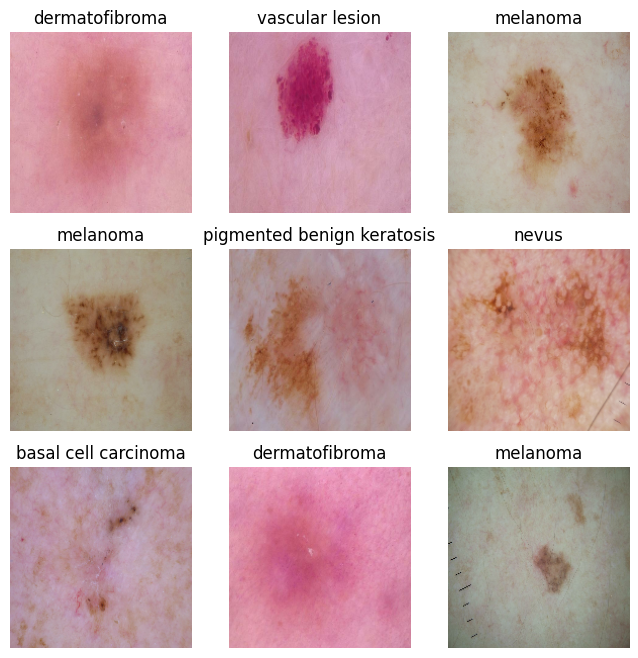

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

        

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# lets print the the shape of test and train data
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
input_shape = (180,180,3)
num_classes = 9
# Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
# 64,64 is the size of the filter
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
           

                         

])

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(9, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 118336)            0

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',              
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])




In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 118336)            0

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
211/211 [==============================] - 466s 2s/step - loss: 1.9359 - accuracy: 0.3330 - val_loss: 2.2393 - val_accuracy: 0.2881
Epoch 2/20
211/211 [==============================] - 695s 3s/step - loss: 1.3339 - accuracy: 0.4903 - val_loss: 3.1725 - val_accuracy: 0.3475
Epoch 3/20
211/211 [==============================] - 568s 3s/step - loss: 1.0654 - accuracy: 0.6151 - val_loss: 3.1874 - val_accuracy: 0.2966
Epoch 4/20
211/211 [==============================] - 343s 2s/step - loss: 0.8538 - accuracy: 0.6921 - val_loss: 3.3998 - val_accuracy: 0.3644
Epoch 5/20
211/211 [==============================] - 329s 2s/step - loss: 0.6805 - accuracy: 0.7531 - val_loss: 3.3358 - val_accuracy: 0.3729
Epoch 6/20
211/211 [==============================] - 343s 2s/step - loss: 0.5514 - accuracy: 0.8007 - val_loss: 4.6196 - val_accuracy: 0.3305
Epoch 7/20
211/211 [==============================] - 344s 2s/step - loss: 0.4104 - accuracy: 0.8526 - val_loss: 5.4814 - val_accuracy: 0.3051

### Visualizing training results

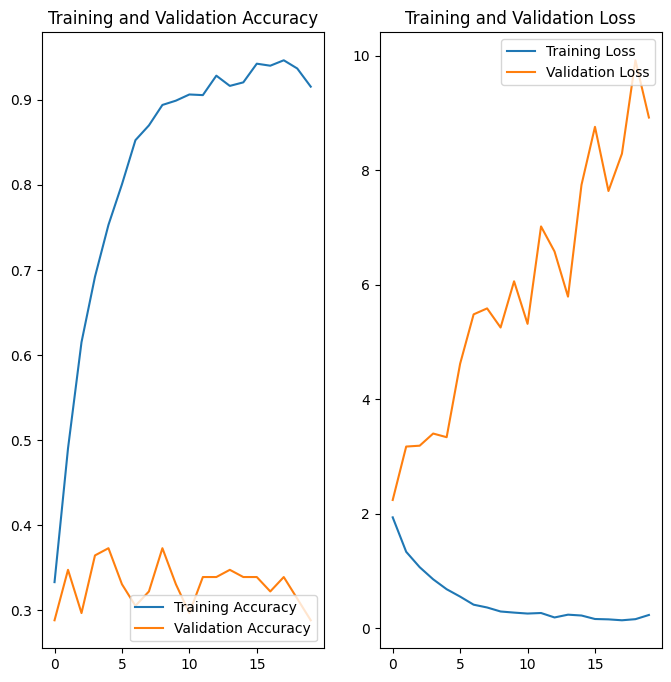

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Not a good model 91% accuracy on test data and validation accuracy is 28% which is not a good model. Its overfitting the data. Also we can see that in graphs that the model is overfitting the data. So we need to do some data augmentation and dropout to reduce overfitting.



#### Yes-above model is overfitting as the training accuracy is round 77% and validation accuracy is round 30%

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal",
                                                        input_shape=(img_height,
                                                                    img_width,
                                                                    3)),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)



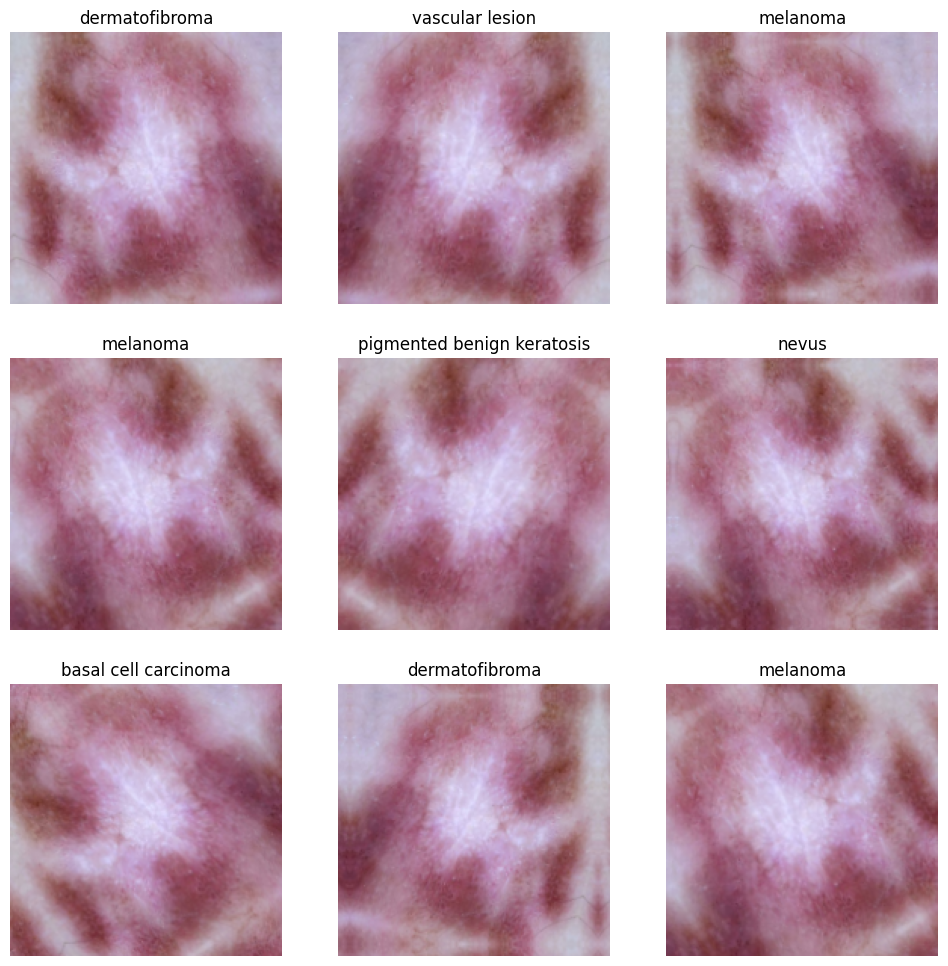

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(12, 12))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        # add name of the class here
        plt.title(class_names[labels[i]])
        plt.axis("off")


        

### Todo: Model 2
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

# create model with dropout this time i am creating function for model

def model_with_dropout(input_shape, num_classes):
    model = Sequential()
    model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

input_shape = (180,180,3)
num_classes = 9

model = model_with_dropout(input_shape, num_classes)
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_16 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 89, 89, 32)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 43, 43, 32)       0         
 g2D)                                                

### Compiling the model

In [ ]:
## Your code goes here
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_16 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 89, 89, 32)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 43, 43, 32)       0         
 g2D)                                                

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
211/211 [==============================] - 172s 809ms/step - loss: 1.9683 - accuracy: 0.2505 - val_loss: 1.9382 - val_accuracy: 0.2966
Epoch 2/20
211/211 [==============================] - 276s 1s/step - loss: 1.4803 - accuracy: 0.4403 - val_loss: 2.0083 - val_accuracy: 0.3220
Epoch 3/20
211/211 [==============================] - 192s 911ms/step - loss: 1.3114 - accuracy: 0.5078 - val_loss: 2.5026 - val_accuracy: 0.3814
Epoch 4/20
211/211 [==============================] - 180s 853ms/step - loss: 1.1642 - accuracy: 0.5622 - val_loss: 2.5040 - val_accuracy: 0.3390
Epoch 5/20
211/211 [==============================] - 184s 870ms/step - loss: 1.0414 - accuracy: 0.6163 - val_loss: 2.9828 - val_accuracy: 0.4153
Epoch 6/20
211/211 [==============================] - 179s 848ms/step - loss: 0.8937 - accuracy: 0.6750 - val_loss: 3.2022 - val_accuracy: 0.3729
Epoch 7/20
211/211 [==============================] - 178s 845ms/step - loss: 0.7946 - accuracy: 0.7043 - val_loss: 3.5840 - va

### Visualizing the results

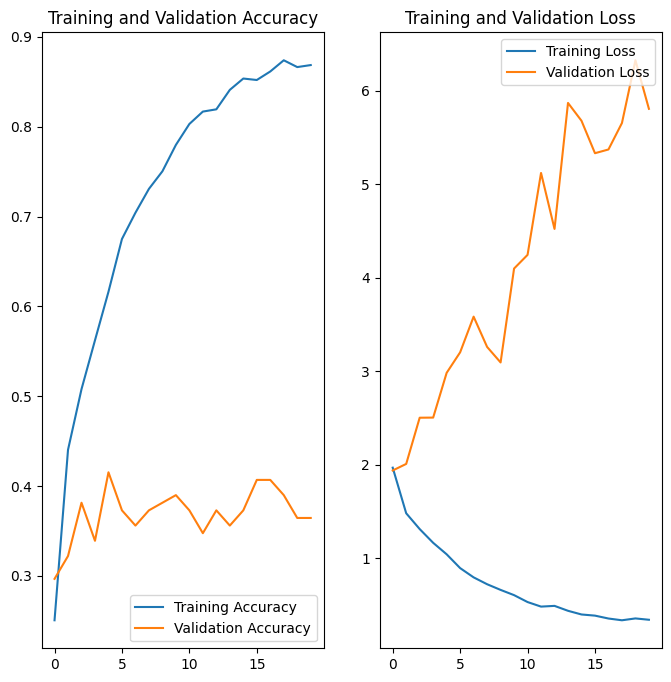

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# lets check accuracy on training and validation set
train_loss, train_acc = model.evaluate(train_ds, verbose=2)
test_loss, test_acc = model.evaluate(val_ds, verbose=2)
print(f"Training Accuracy: {train_acc}")
print(f"Validation Accuracy: {test_acc}")
print(f"Training Loss: {train_loss}")
print(f"Validation Loss: {test_loss}")


211/211 - 31s - loss: 0.2045 - accuracy: 0.9277 - 31s/epoch - 147ms/step
4/4 - 1s - loss: 5.8075 - accuracy: 0.3644 - 604ms/epoch - 151ms/step
Training Accuracy: 0.9277340769767761
Validation Accuracy: 0.3644067943096161
Training Loss: 0.20449425280094147
Validation Loss: 5.8074631690979


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### findings are accuracy is reduced to 86% and validation accuracy is 36% which is not a good model. Its overfitting the data.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

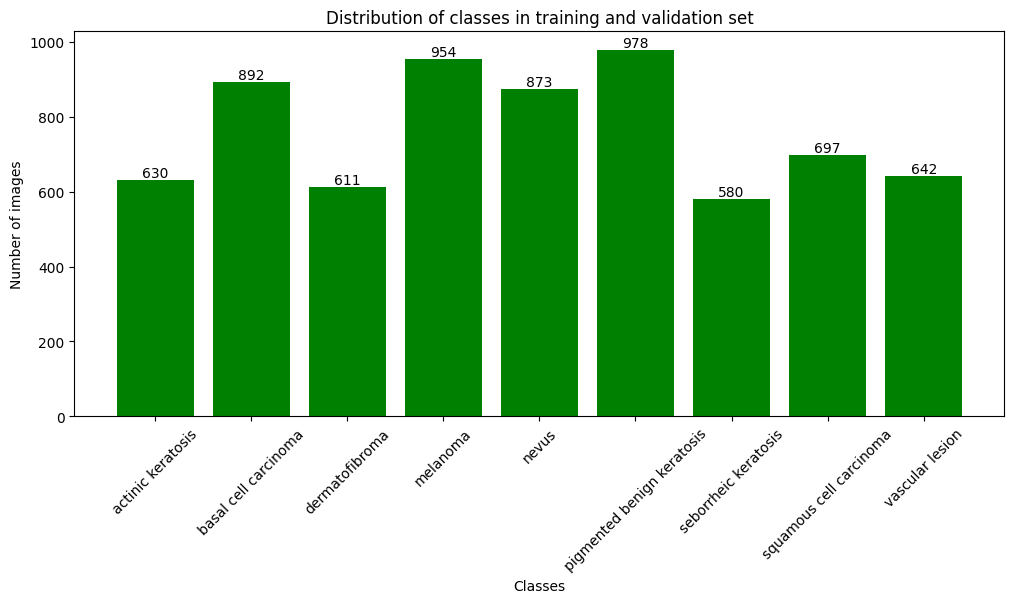

In [ ]:
## Your code goes here. for distribution of classes in training and validation set

# create bar plot for distribution of classes in training and validation set
from matplotlib import pyplot as plt


data=dict()
for i in class_names:
  data[i] = []

for images, labels in train_ds:
    for i in labels:
        data[class_names[i.numpy()]].append(i.numpy())

for images, labels in val_ds:
    for i in labels:
        data[class_names[i.numpy()]].append(i.numpy())

for i in class_names:
    data[i] = len(data[i])

fig=plt.figure(figsize=(12, 5))
plt.bar(data.keys(), data.values(), color='g')
plt.xlabel("Classes")
plt.ylabel("Number of images")
plt.title("Distribution of classes in training and validation set")
# rotate x-axis labels 
plt.xticks(rotation=45)

# add labels to bars
for i in data.keys():
    plt.text(i, data[i], data[i], ha='center', va='bottom')


plt.show()


#### **Todo:** Write your findings here:  
#### Findings-
#### - Which class has the least number of samples?
#### - Least calss samples category are seborrheic Keratosos Actinic Keratosos 
#### - Which classes dominate the data in terms proportionate number of samples?
#### - Domination of the data in term of proportionate number of samples is Pigmented benign keratosis dominates the data of count more than 100 in training


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
# path_to_training_dataset="C:/Python/Dashboard/python_upgrad/Nural Network/Assignment/photo_data/train/"
path_to_training_dataset="gdrive/My Drive/Cancer_photos_assignment/photo_data/Train/"
import Augmentor

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:/Python/Dashboard/python_upgrad/Nural Network/Assignment/photo_data/train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x15811405270>: 100%|██████████| 500/500 [00:04<00:00, 117.30 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to C:/Python/Dashboard/python_upgrad/Nural Network/Assignment/photo_data/train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x158AB2A1C30>: 100%|██████████| 500/500 [00:04<00:00, 103.23 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to C:/Python/Dashboard/python_upgrad/Nural Network/Assignment/photo_data/train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x158AEDAF400>: 100%|██████████| 500/500 [00:05<00:00, 98.93 Samples/s]                   


Initialised with 438 image(s) found.
Output directory set to C:/Python/Dashboard/python_upgrad/Nural Network/Assignment/photo_data/train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2592x1944 at 0x158AB101B40>: 100%|██████████| 500/500 [00:33<00:00, 15.12 Samples/s]


Initialised with 357 image(s) found.
Output directory set to C:/Python/Dashboard/python_upgrad/Nural Network/Assignment/photo_data/train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x15828B5B9A0>: 100%|██████████| 500/500 [00:32<00:00, 15.53 Samples/s]                   


Initialised with 462 image(s) found.
Output directory set to C:/Python/Dashboard/python_upgrad/Nural Network/Assignment/photo_data/train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x15811499BD0>: 100%|██████████| 500/500 [00:08<00:00, 59.74 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to C:/Python/Dashboard/python_upgrad/Nural Network/Assignment/photo_data/train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1588BC5DC00>: 100%|██████████| 500/500 [00:18<00:00, 26.34 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:/Python/Dashboard/python_upgrad/Nural Network/Assignment/photo_data/train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x15813A08940>: 100%|██████████| 500/500 [00:08<00:00, 62.43 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to C:/Python/Dashboard/python_upgrad/Nural Network/Assignment/photo_data/train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x15828B5BF70>: 100%|██████████| 500/500 [00:08<00:00, 58.07 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Python\\Dashboard\\python_upgrad\\Nural Network\\Assignment\\photo_data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_69466ac1-ac95-45e1-a038-5faec7468e81.jpg',
 'C:\\Python\\Dashboard\\python_upgrad\\Nural Network\\Assignment\\photo_data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_c1a249f8-d30f-4a70-ba5f-de3ddcd104dd.jpg',
 'C:\\Python\\Dashboard\\python_upgrad\\Nural Network\\Assignment\\photo_data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_446877ae-0bdf-47b8-807e-d12f3d83bda3.jpg',
 'C:\\Python\\Dashboard\\python_upgrad\\Nural Network\\Assignment\\photo_data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025825.jpg_64ff9084-d4b3-4c4c-8ca7-c518213f07e4.jpg',
 'C:\\Python\\Dashboard\\python_upgrad\\Nural Network\\Assignment\\photo_data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025825.jpg_83976cb4-9860-4240-ac6b-3038a3c564b4.jpg',


In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
path_list_new = [os.path.basename(y) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2.sample(frac=1).reset_index(drop=True)

In [ ]:
new_df['Label'].value_counts()

melanoma                      500
basal cell carcinoma          500
dermatofibroma                500
squamous cell carcinoma       500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
actinic keratosis             500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
# create training dataset
train_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)



Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
# create validation dataset
val_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here Create your model (make sure to include normalization)
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# lets perform the Normalization



def model_with_dropout(input_shape, num_classes):
    model = Sequential()
    model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

input_shape = (180,180,3)
num_classes = 9

model = model_with_dropout(input_shape, num_classes)
model.summary()
                   


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_29 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_83 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_20 (Bat  (None, 89, 89, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_67 (Dropout)        (None, 89, 89, 32)        0         
                                                                 
 conv2d_84 (Conv2D)          (None, 87, 87, 32)      

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])


#### **Todo:**  Train your model

In [ ]:
epochs = 50
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
## Your code goes here, use 50 epochs.
history = model.fit(
    train_ds_new,
    validation_data=val_ds_new,
    epochs=epochs,
    callbacks=[learning_rate_reduction]
)

Epoch 1/50
169/169 [==============================] - 220s 1s/step - loss: 1.8893 - accuracy: 0.2693 - val_loss: 2.1566 - val_accuracy: 0.2264 - lr: 0.0010
Epoch 2/50
169/169 [==============================] - 264s 2s/step - loss: 1.5253 - accuracy: 0.4219 - val_loss: 1.9616 - val_accuracy: 0.3437 - lr: 0.0010
Epoch 3/50
169/169 [==============================] - 252s 1s/step - loss: 1.3161 - accuracy: 0.5145 - val_loss: 1.5853 - val_accuracy: 0.3964 - lr: 0.0010
Epoch 4/50
169/169 [==============================] - 243s 1s/step - loss: 1.1555 - accuracy: 0.5909 - val_loss: 1.3338 - val_accuracy: 0.5078 - lr: 0.0010
Epoch 5/50
169/169 [==============================] - 244s 1s/step - loss: 0.9518 - accuracy: 0.6541 - val_loss: 1.0005 - val_accuracy: 0.6555 - lr: 0.0010
Epoch 6/50
169/169 [==============================] - 246s 1s/step - loss: 0.7822 - accuracy: 0.7155 - val_loss: 1.0367 - val_accuracy: 0.6355 - lr: 0.0010
Epoch 7/50
169/169 [==============================] - 247s 1s/st

#### **Todo:**  Visualize the model results

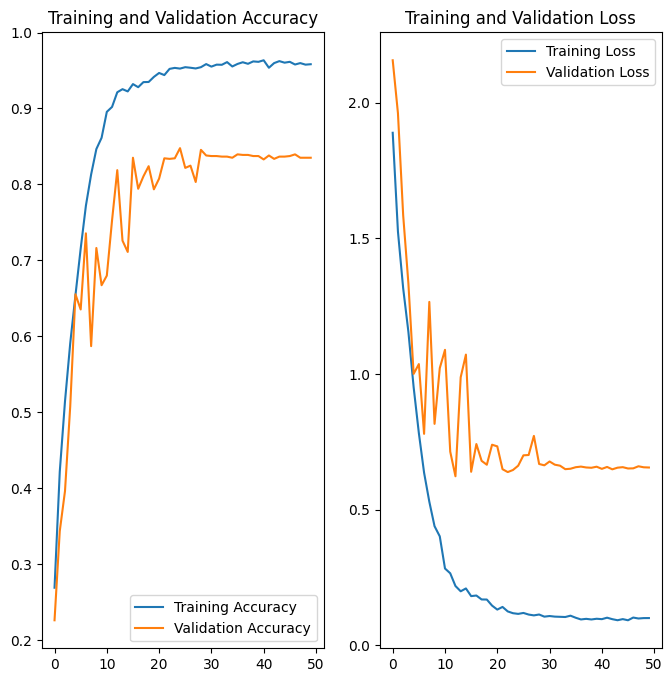

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
## Analysis of the model

# 1. class rebalance was done by adding 500 samples per class it helped in improving the accuracy of the model 
# 2. Data Augmentation was done 
# 3. Dropout was added to the model for reducing the overfitting and normalization was done to the model for improving the accuracy of the model
# 4. As we can see from the above graph the training accuracy is 96% and validation accuracy is 85% which is a good improvement from the previous model
